In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import os
os.chdir('D:\Python_csv_files')
df = pd.read_excel("chaljaa.xlsx")

In [2]:
feature_df = df[['preg_count', 'glu_conc', 'tricep_thickness', 'insulin', 'BMI', 'DPF', 'Age']]
X = np.asarray(feature_df)
df['class'] = df['class'].astype('int')
y = np.asarray(df['class'])

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (614, 7) (614,)
Test set: (154, 7) (154,)


In [4]:
from sklearn import svm
clf = svm.SVC(kernel='linear')

clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
yhat = clf.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

             precision    recall  f1-score   support

          0       0.85      0.87      0.86       102
          1       0.73      0.69      0.71        52

avg / total       0.81      0.81      0.81       154

Confusion matrix, without normalization
[[36 16]
 [13 89]]


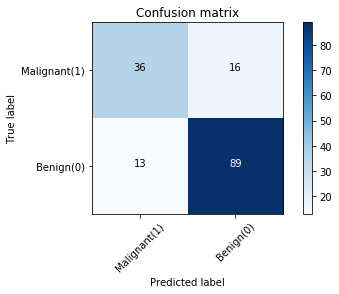

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Malignant(1)','Benign(0)'],normalize= False,  title='Confusion matrix')

In [7]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.8102561808975928

In [8]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.8116883116883117

In [9]:
from sklearn.metrics import hinge_loss
hinge_loss(y_test,yhat)

0.8506493506493507

In [ ]:
clf2 = svm.SVC(kernel='linear')
clf3 = svm.SVC(kernel='poly')
clf4 = svm.SVC(kernel='sigmoid')
 
clf2.fit(X_train, y_train) 
clf3.fit(X_train, y_train) 
clf4.fit(X_train, y_train) 

yhat2 = clf2.predict(X_test)
yhat3 = clf3.predict(X_test)
yhat4 = clf4.predict(X_test)
from sklearn.metrics import f1_score

print('linear accuracy:',f1_score(y_test, yhat2, average='weighted'))
print('poly accuracy:',f1_score(y_test, yhat3, average='weighted'))
print('sigmoid accuracy:',f1_score(y_test, yhat4, average='weighted'))